In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.NAN
all_data = pd.concat([train, test])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_test
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1.0
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.0
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.0
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1.0
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.0
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.0
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1.0


In [10]:
#low_cardinality_num_cols = [col for col in train.columns if train[col].nunique() <= 15 and train[col].dtype in ['int64', 'float64']]
#low_Cardinality_object_cols = [col for col in train.columns if train[col].nunique() <= 15 and train[col].dtype == 'object']
#df_cat = train[low_cardinality_num_cols] + train[low_Cardinality_object_cols]
#cols = low_cardinality_num_cols + low_Cardinality_object_cols
#df_cat = train[cols]
#print(low_cardinality_num_cols)
#print(low_Cardinality_object_cols)
#df_cat.columns

In [11]:
#cat_cols = [low_cardinality_num_cols + low_Cardinality_object_cols]
#cols_to_use=train.columns.difference(df_cat.columns)
#df_num = train[cols_to_use]
#cols_to_use

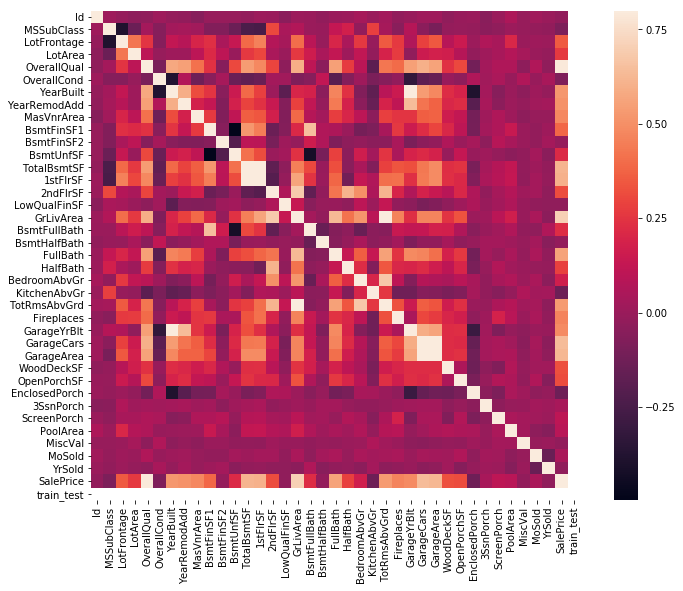

In [8]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), vmax=.8, square=True);

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


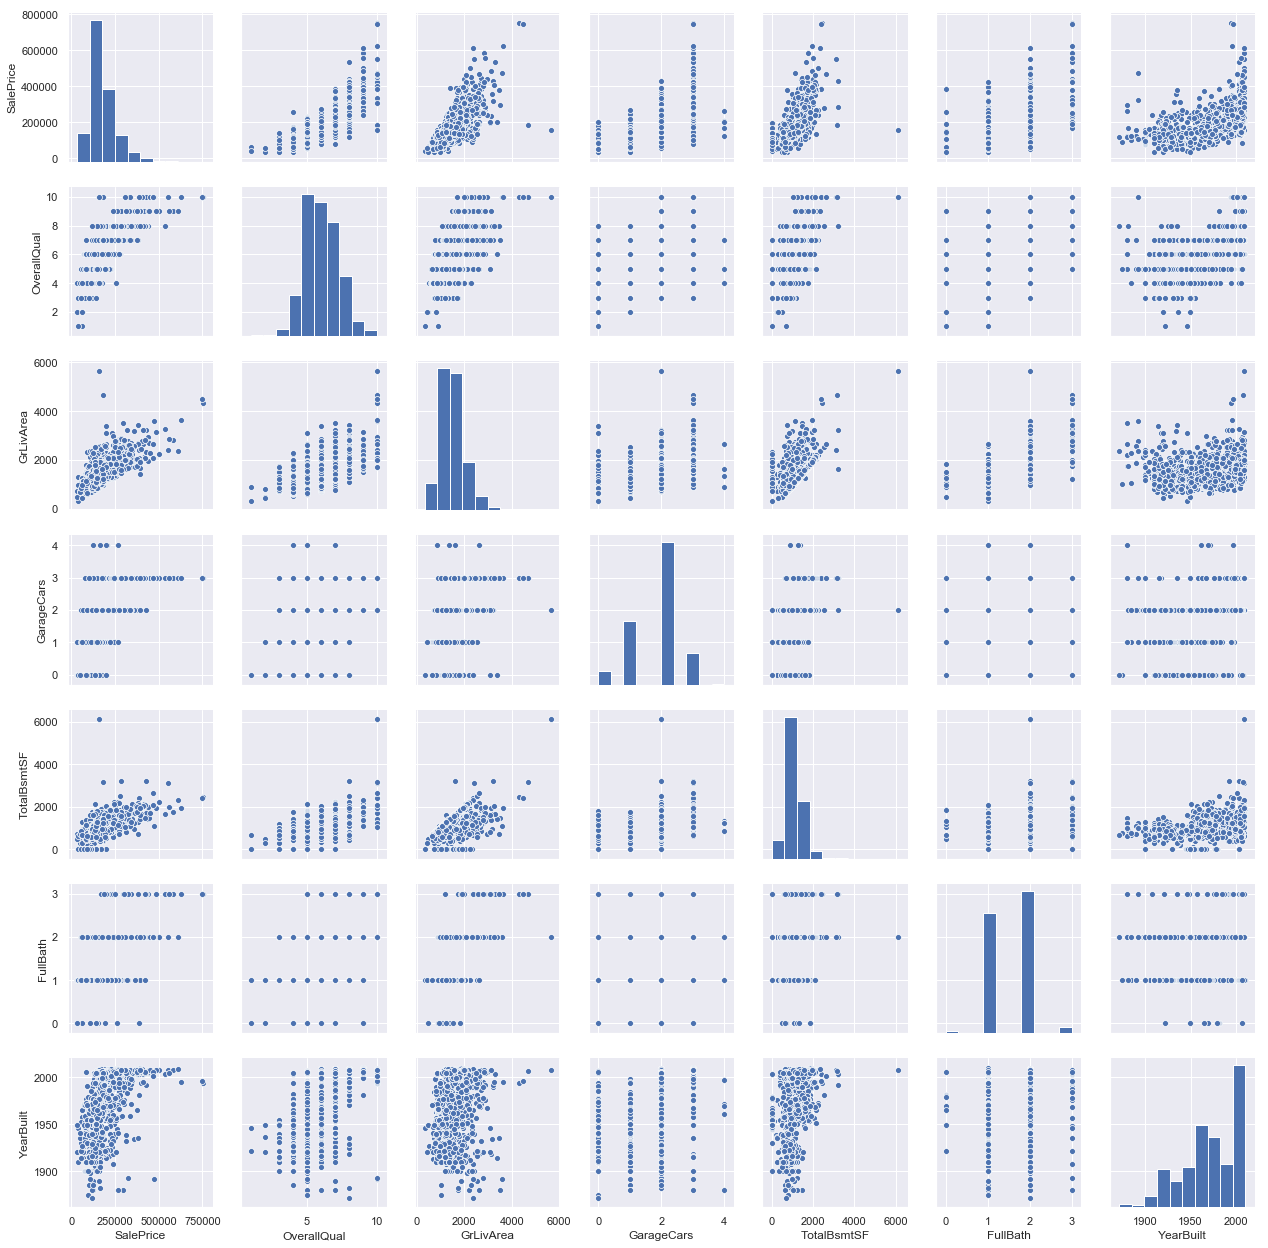

In [9]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [10]:
low_cardinality_num_cols = [col for col in train.columns if train[col].nunique() <= 15 and train[col].dtype in ['int64', 'float64']]
low_Cardinality_object_cols = [col for col in train.columns if train[col].dtype == 'object']
cols = low_cardinality_num_cols + low_Cardinality_object_cols
df_cat = train[cols]
df_cat.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold',
       'YrSold', 'train_test', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
cols_to_use=train.columns.difference(df_cat.columns)
df_num = train[cols_to_use]
df_num.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'Id', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [12]:
train.shape

(1460, 82)

In [13]:
df_cat.shape

(1460, 59)

In [14]:
df_num.shape

(1460, 23)

In [15]:
df_num = df_num.drop("Id", axis = 1)
df_cat = df_cat.drop("train_test", axis = 1)

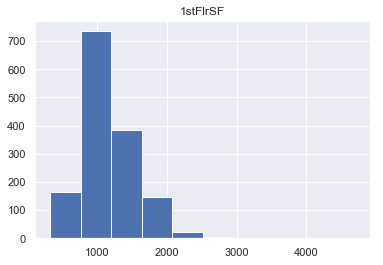

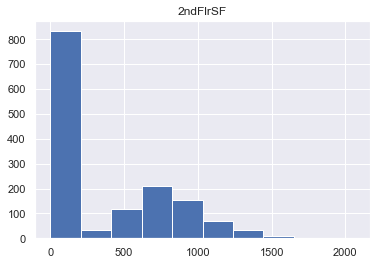

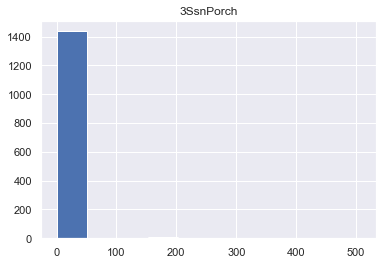

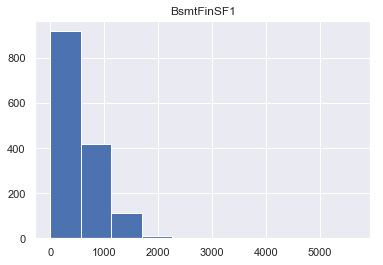

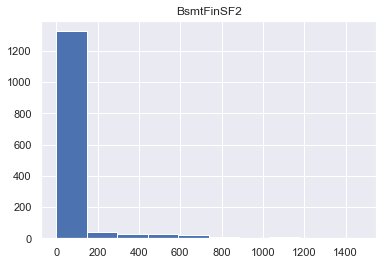

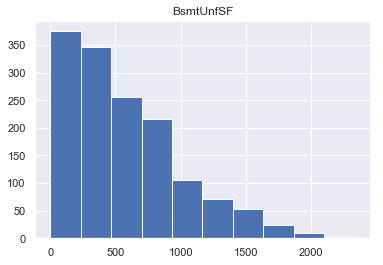

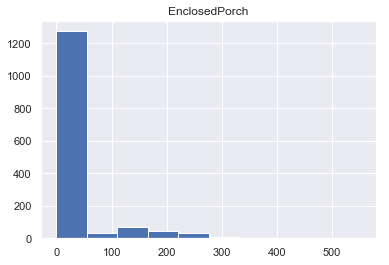

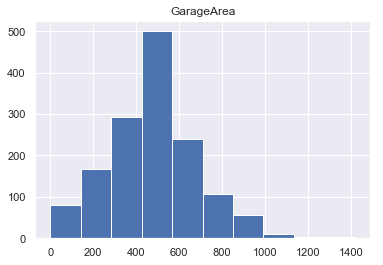

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


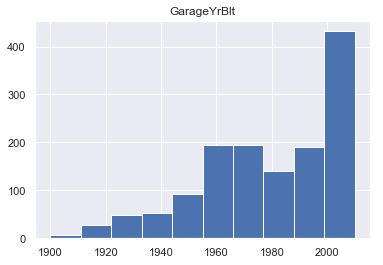

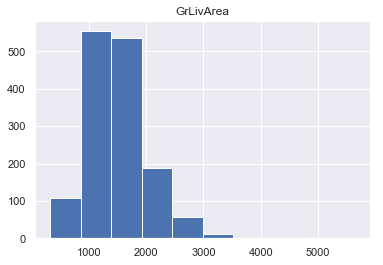

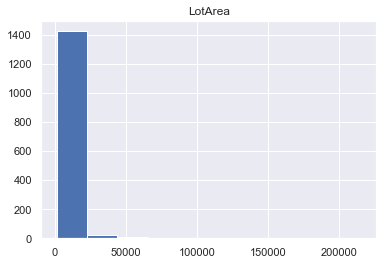

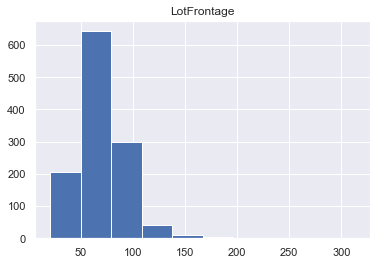

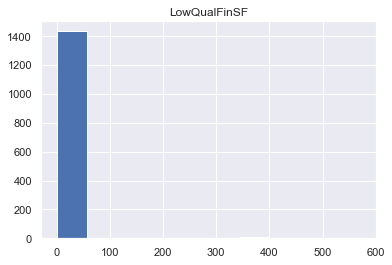

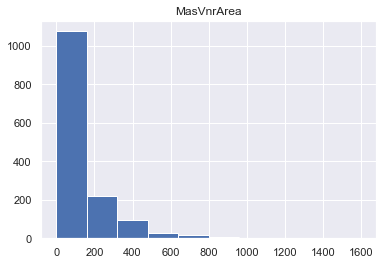

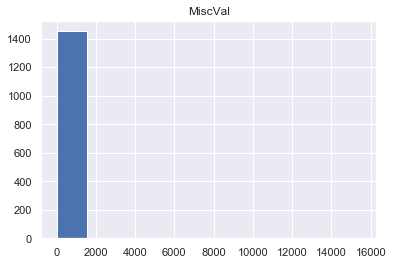

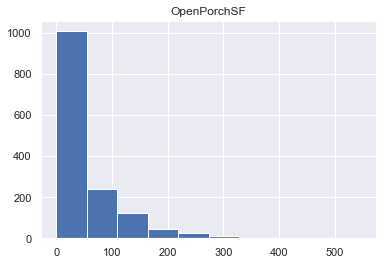

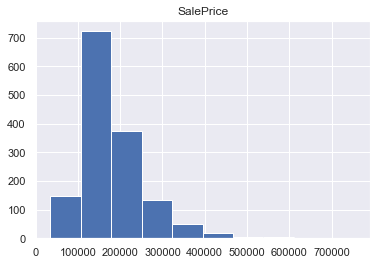

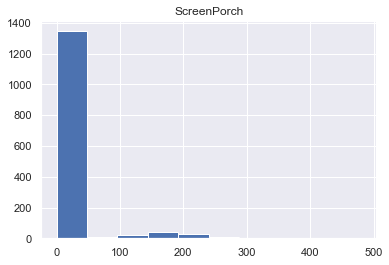

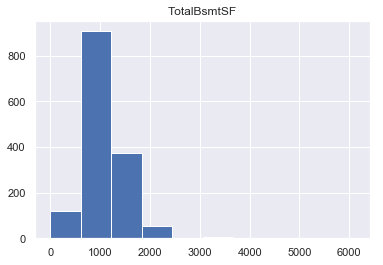

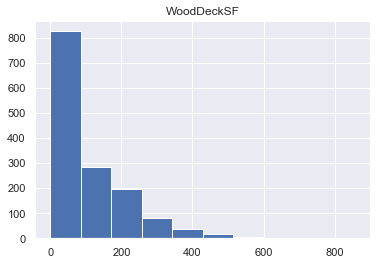

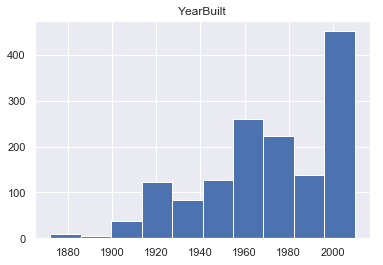

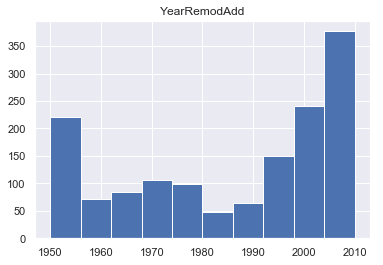

In [16]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [17]:
print(df_num.corr())

               1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  \
1stFlrSF       1.000000 -0.202646   0.056104    0.445863    0.097117   
2ndFlrSF      -0.202646  1.000000  -0.024358   -0.137079   -0.099260   
3SsnPorch      0.056104 -0.024358   1.000000    0.026451   -0.029993   
BsmtFinSF1     0.445863 -0.137079   0.026451    1.000000   -0.050117   
BsmtFinSF2     0.097117 -0.099260  -0.029993   -0.050117    1.000000   
BsmtUnfSF      0.317987  0.004469   0.020764   -0.495251   -0.209294   
EnclosedPorch -0.065292  0.061989  -0.037305   -0.102303    0.036543   
GarageArea     0.489782  0.138347   0.035087    0.296970   -0.018227   
GarageYrBlt    0.233449  0.070832   0.023544    0.153484   -0.088011   
GrLivArea      0.566024  0.687501   0.020643    0.208171   -0.009640   
LotArea        0.299475  0.050986   0.020423    0.214103    0.111170   
LotFrontage    0.457181  0.080177   0.070029    0.233633    0.049900   
LowQualFinSF  -0.014241  0.063353  -0.004296   -0.064503    0.01

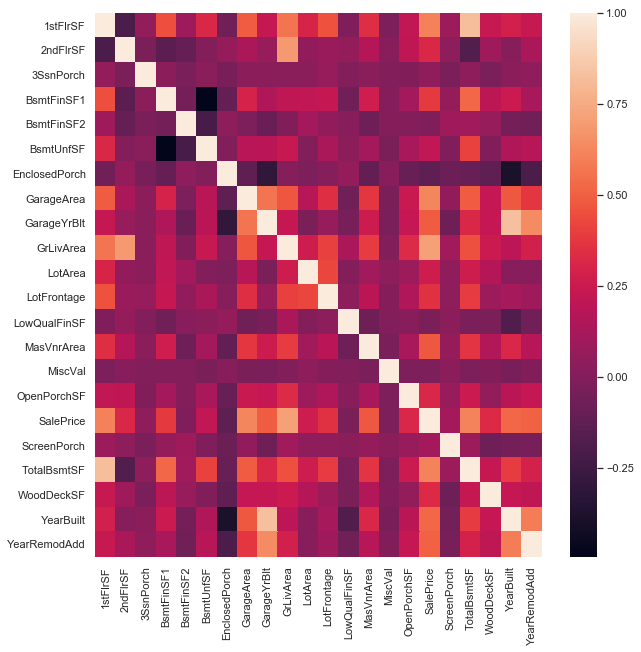

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_num.corr(), ax = ax)

In [19]:
print(df_num.corr() > 0.5)

               1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  \
1stFlrSF           True     False      False       False       False   
2ndFlrSF          False      True      False       False       False   
3SsnPorch         False     False       True       False       False   
BsmtFinSF1        False     False      False        True       False   
BsmtFinSF2        False     False      False       False        True   
BsmtUnfSF         False     False      False       False       False   
EnclosedPorch     False     False      False       False       False   
GarageArea        False     False      False       False       False   
GarageYrBlt       False     False      False       False       False   
GrLivArea          True      True      False       False       False   
LotArea           False     False      False       False       False   
LotFrontage       False     False      False       False       False   
LowQualFinSF      False     False      False       False       F

In [20]:
print(df_num.corr()['SalePrice'])

1stFlrSF         0.605852
2ndFlrSF         0.319334
3SsnPorch        0.044584
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
EnclosedPorch   -0.128578
GarageArea       0.623431
GarageYrBlt      0.486362
GrLivArea        0.708624
LotArea          0.263843
LotFrontage      0.351799
LowQualFinSF    -0.025606
MasVnrArea       0.477493
MiscVal         -0.021190
OpenPorchSF      0.315856
SalePrice        1.000000
ScreenPorch      0.111447
TotalBsmtSF      0.613581
WoodDeckSF       0.324413
YearBuilt        0.522897
YearRemodAdd     0.507101
Name: SalePrice, dtype: float64


In [21]:
pd.pivot_table(df_num, index = 'YearBuilt', values = 'SalePrice')

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
1890,142200.000000
1892,291250.000000
1893,325000.000000
1898,106000.000000


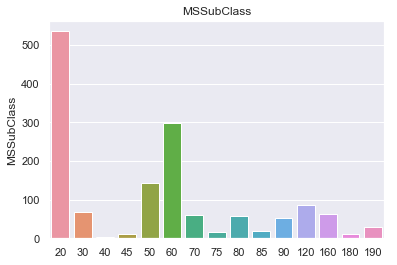

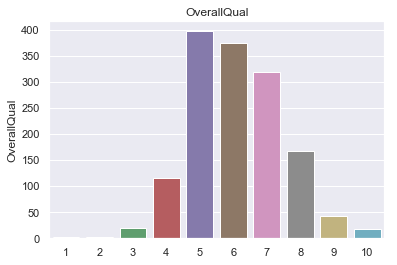

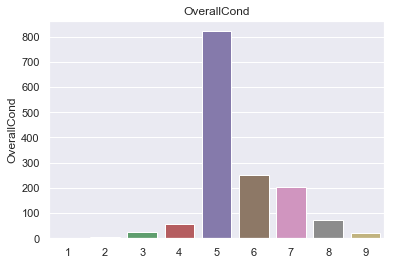

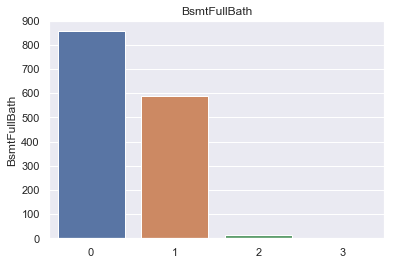

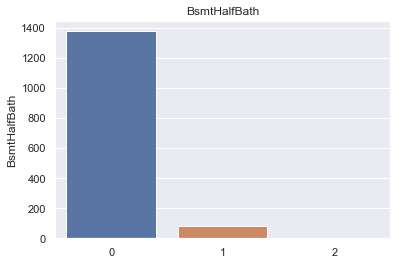

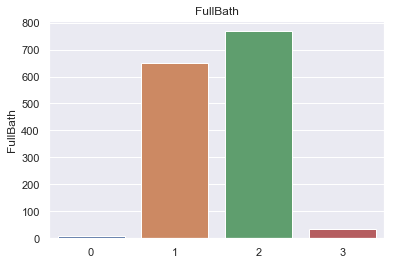

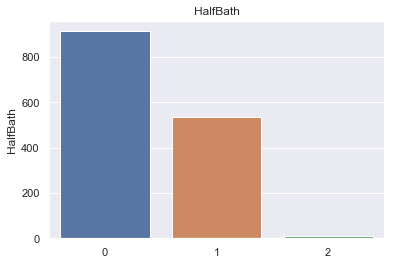

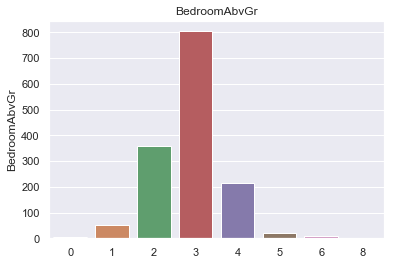

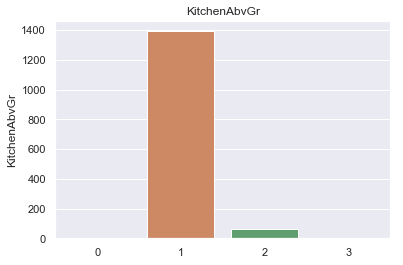

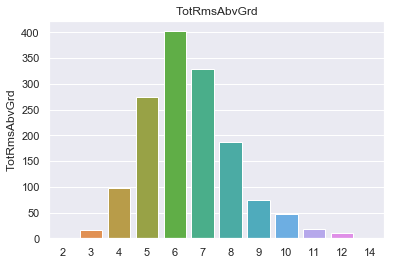

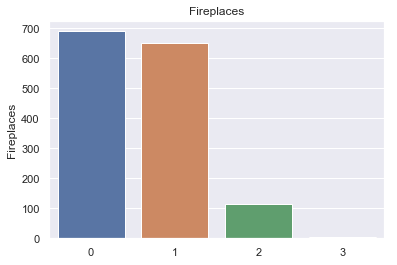

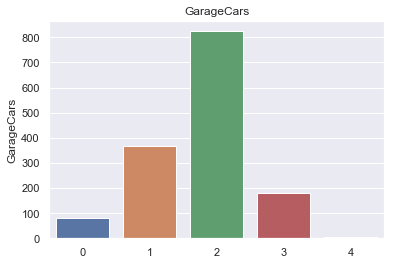

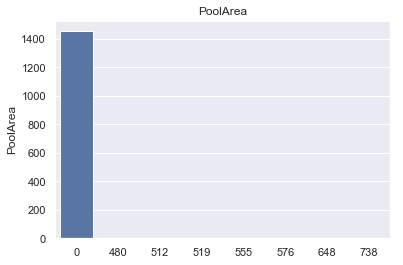

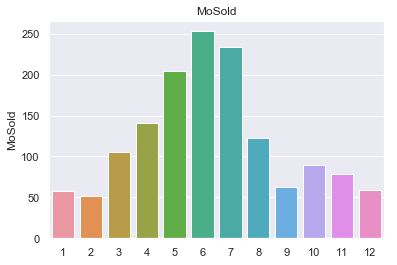

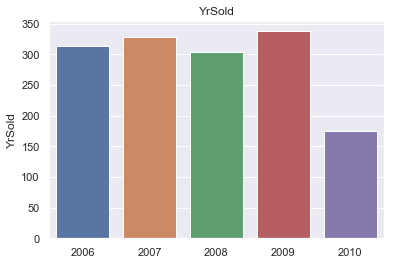

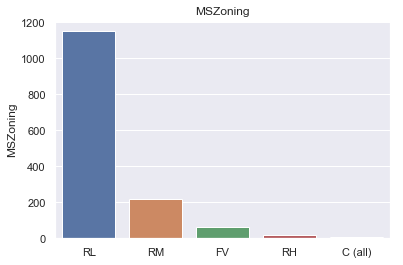

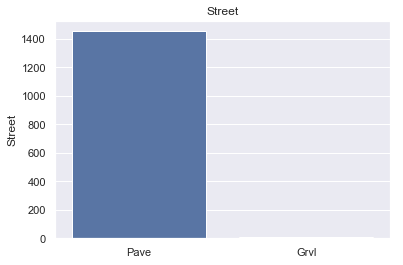

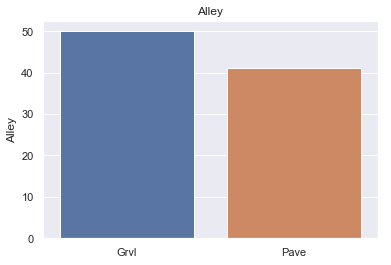

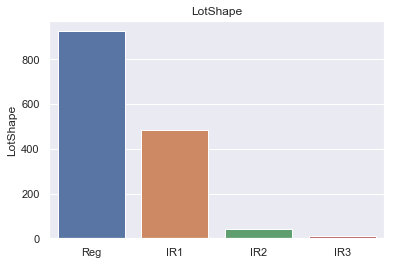

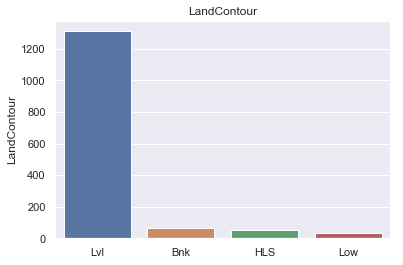

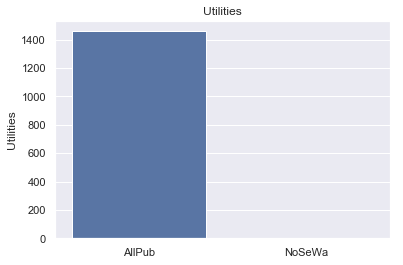

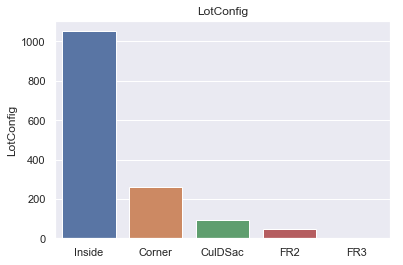

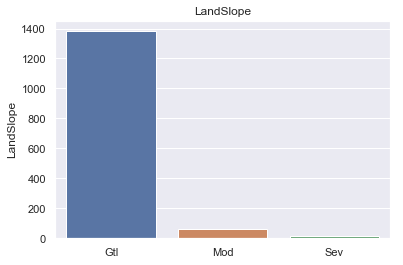

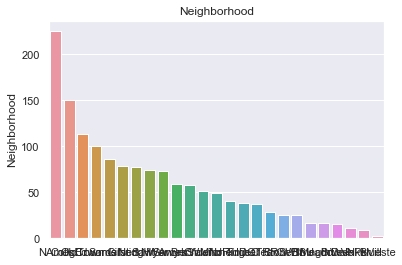

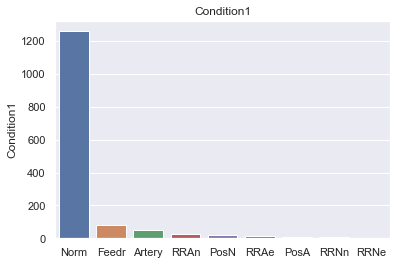

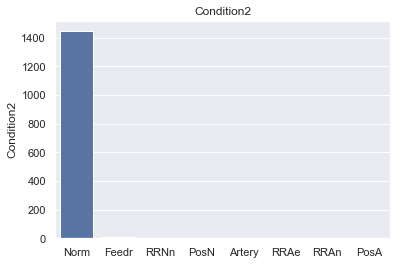

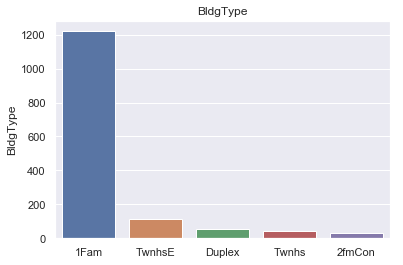

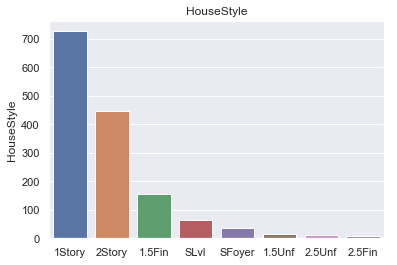

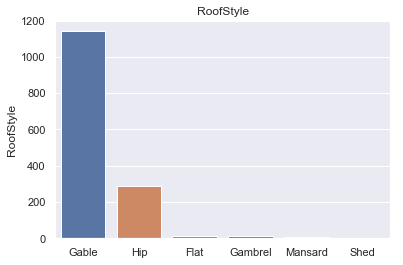

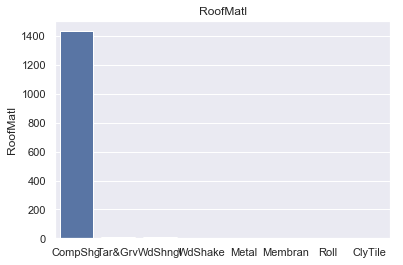

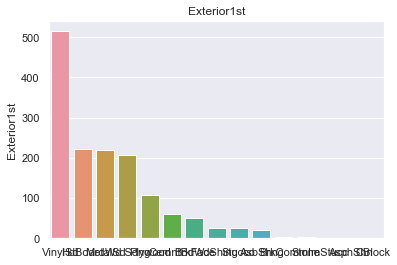

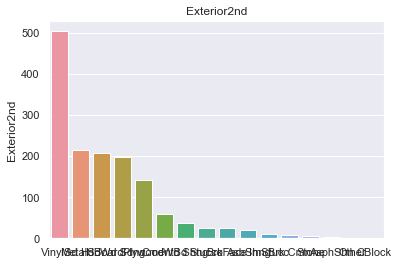

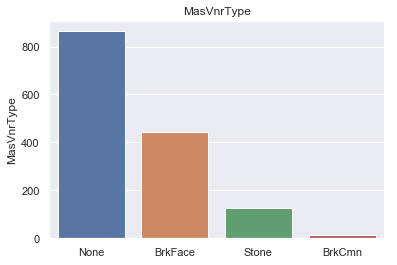

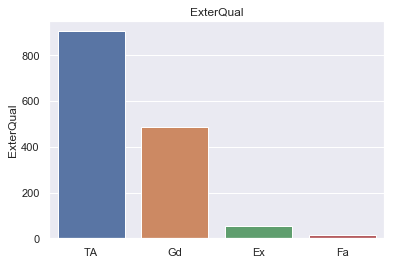

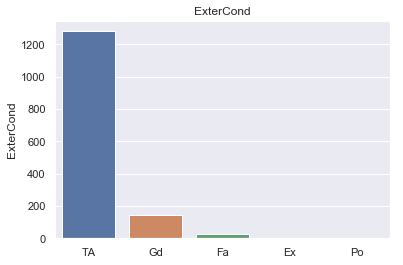

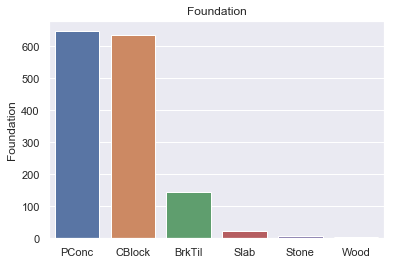

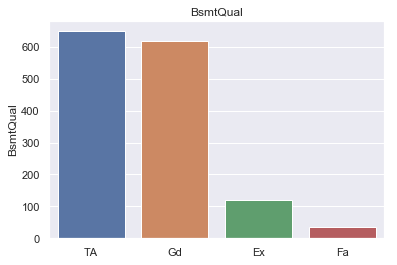

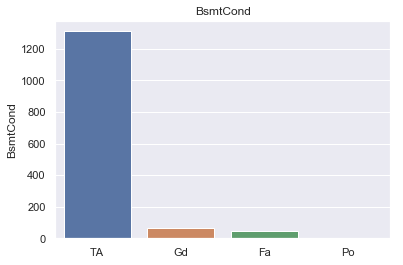

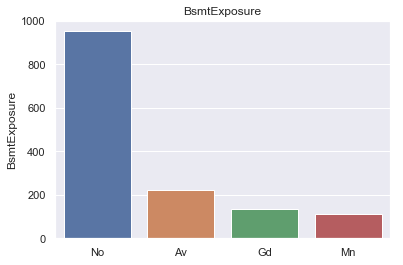

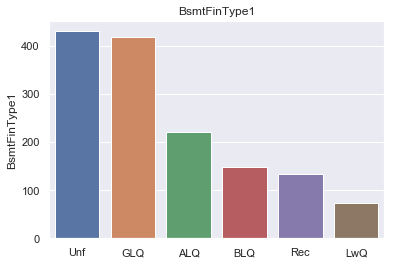

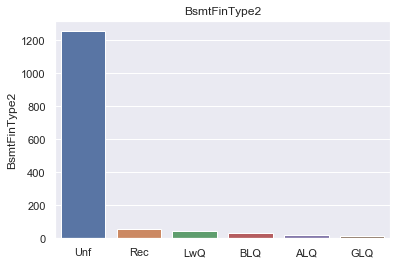

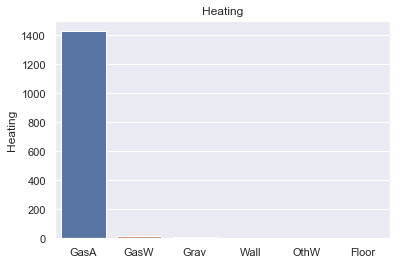

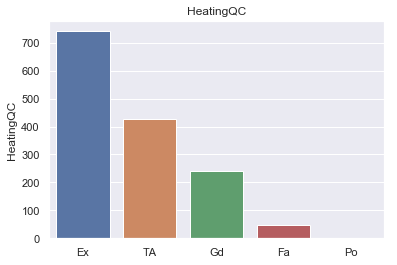

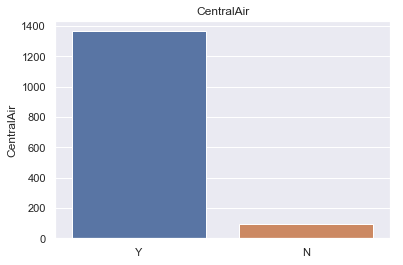

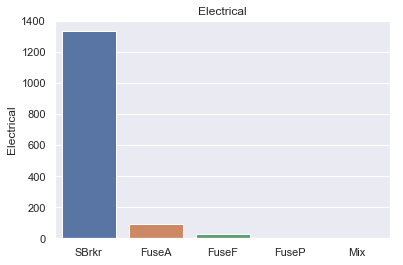

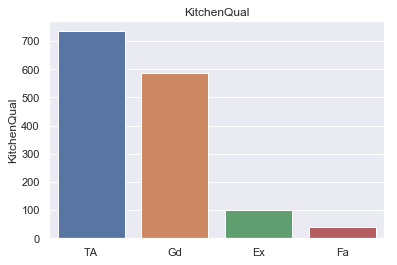

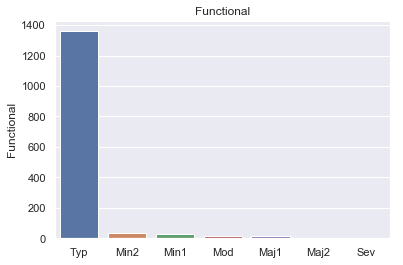

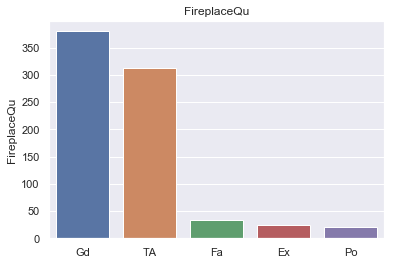

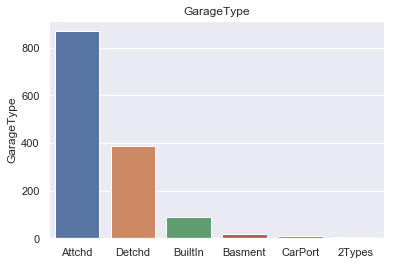

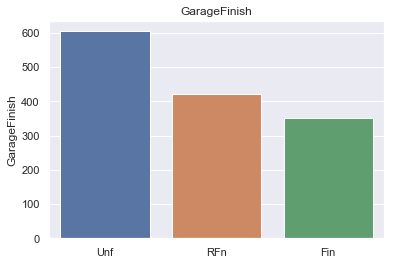

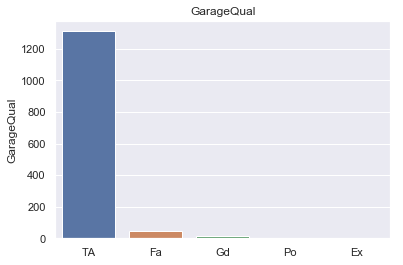

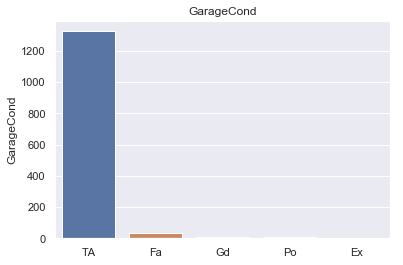

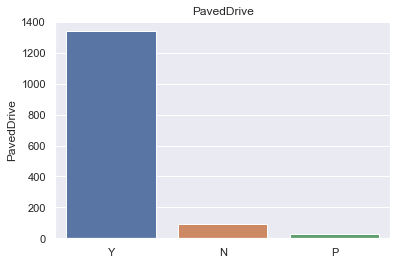

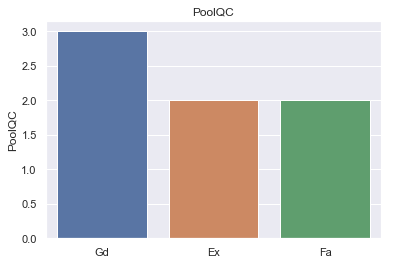

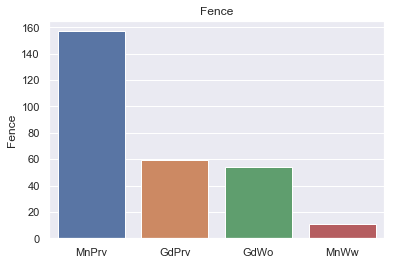

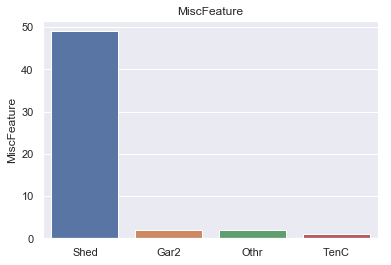

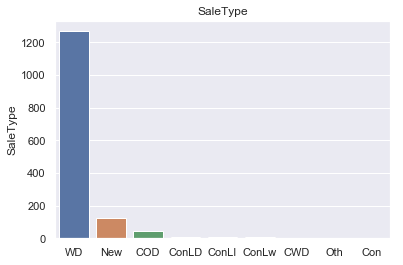

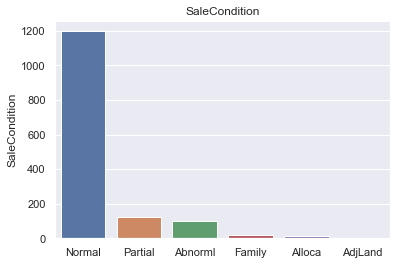

In [22]:
for i in df_cat:
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [23]:
df_cat.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold',
       'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
df_num.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'SalePrice', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

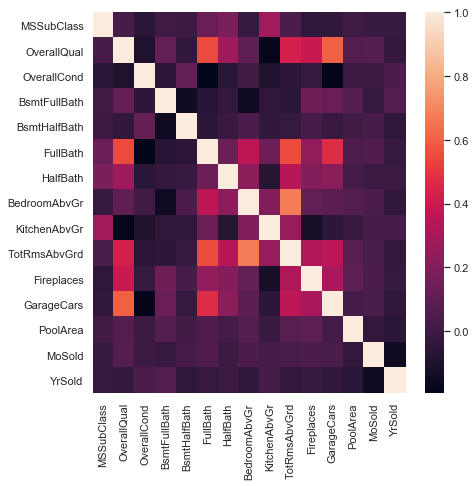

In [25]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_cat.corr(), ax = ax)

In [26]:
pd.pivot_table(train, index = 'BedroomAbvGr', values = 'SalePrice')

,SalePrice
BedroomAbvGr,
0,221493.166667
1,173162.420000
2,158197.659218
3,181056.870647
4,220421.253521
5,180819.047619
6,143779.000000
8,200000.000000


In [27]:
cat_cols = df_cat.columns
print(train.corr()['SalePrice'] > 0.3)

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF          True
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces        True
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF        True
OpenPorchSF       True
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
train_test       False
Name: SalePrice, dtype: bool


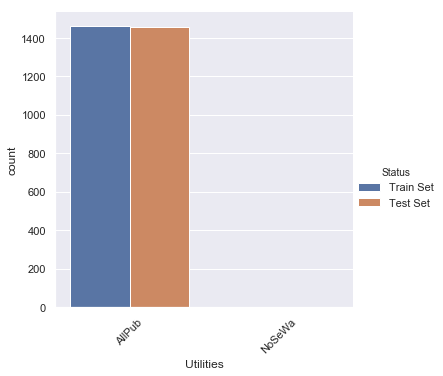

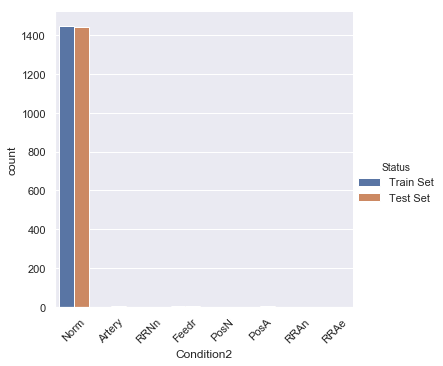

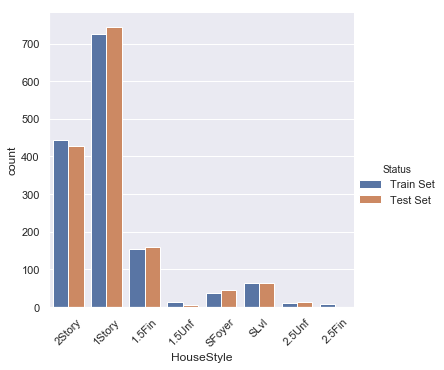

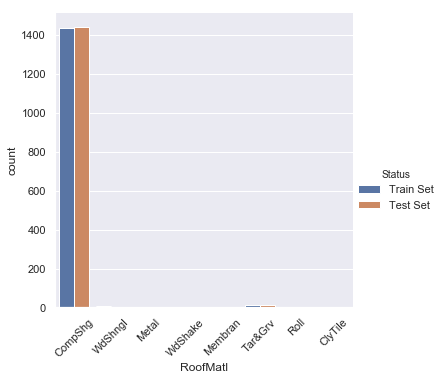

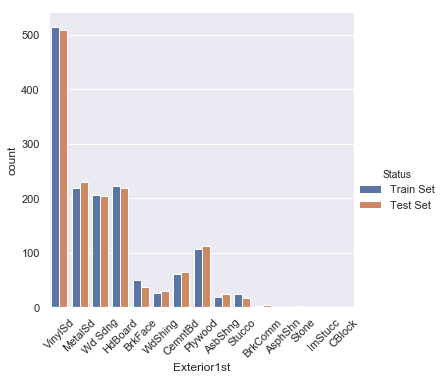

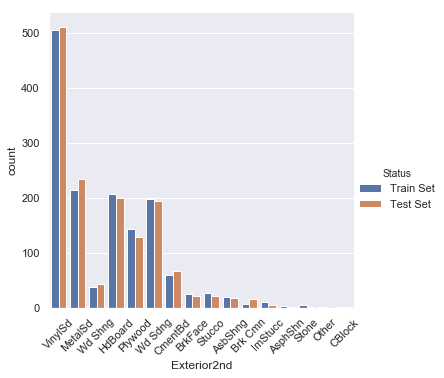

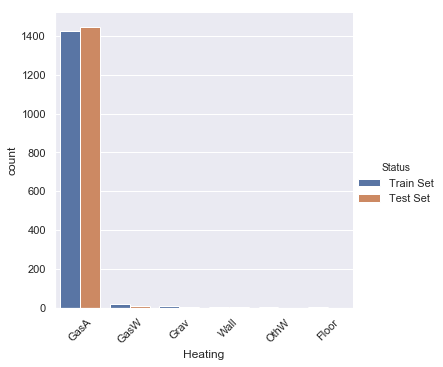

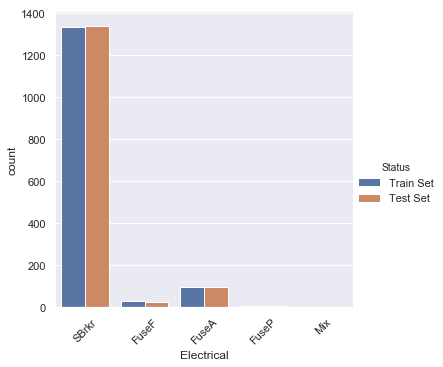

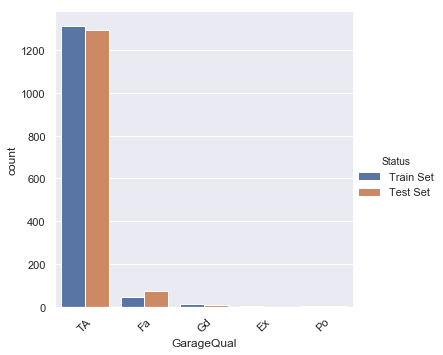

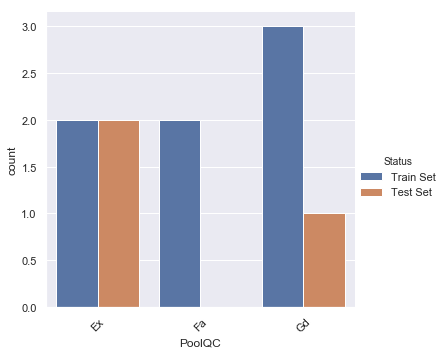

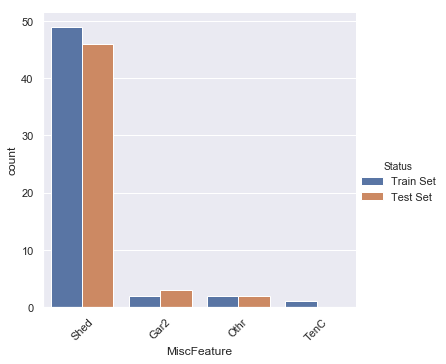

In [32]:
#in order to make charts
train_1 = train.drop(labels = 'SalePrice', axis = 1)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


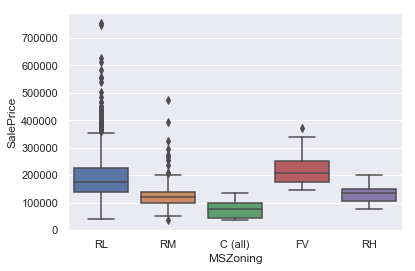

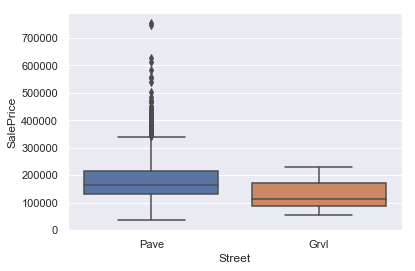

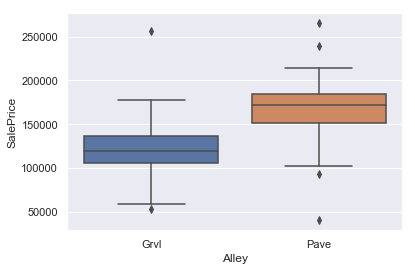

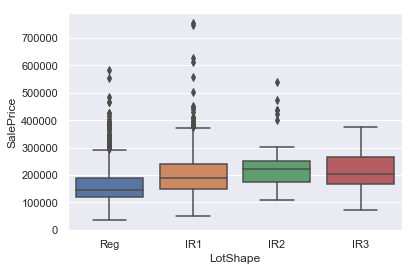

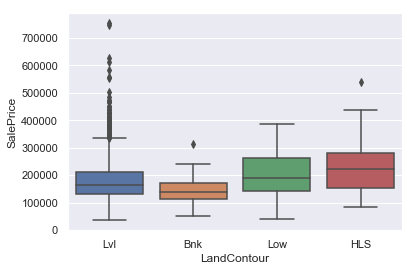

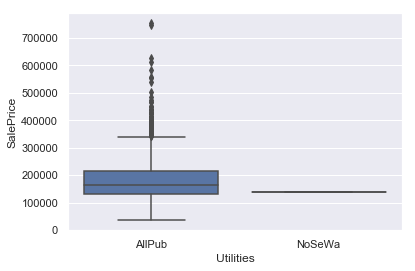

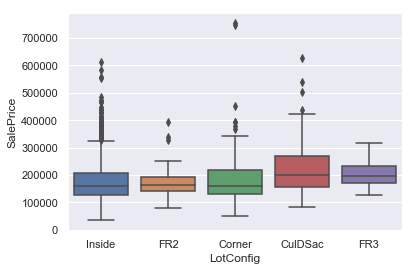

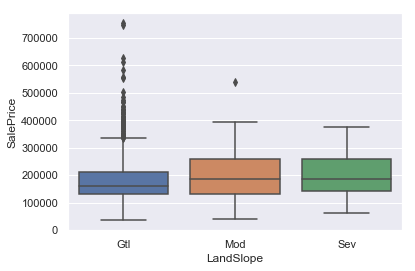

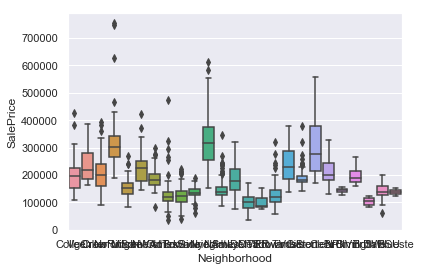

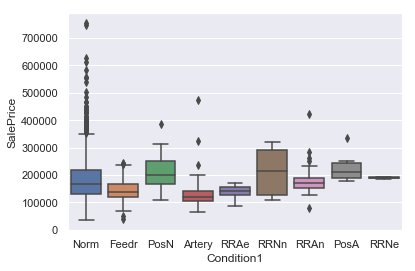

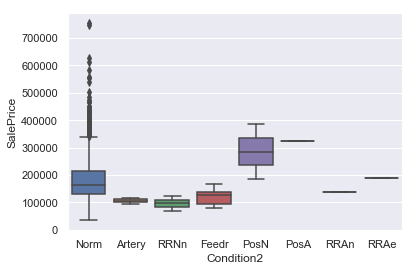

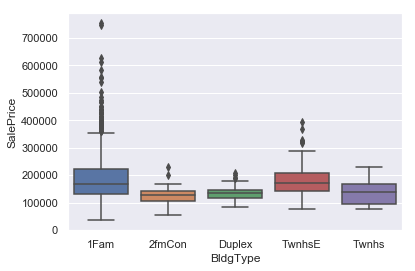

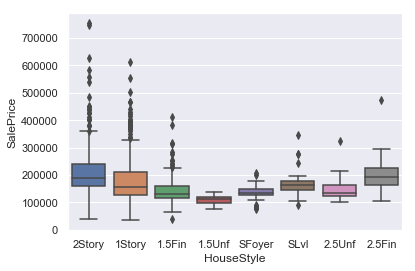

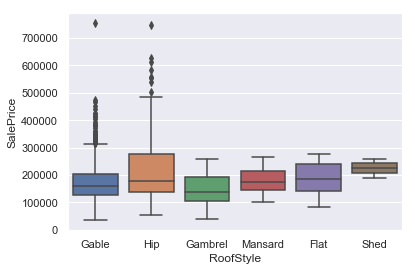

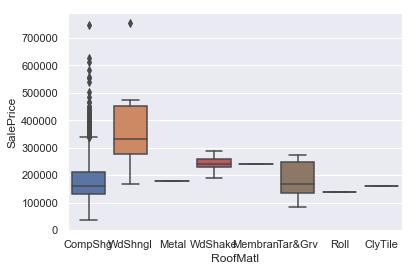

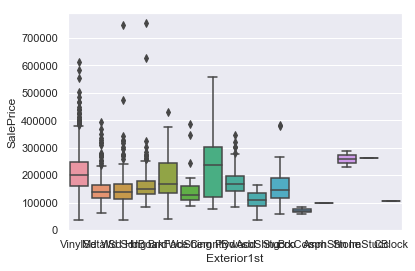

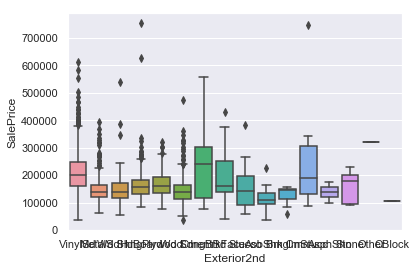

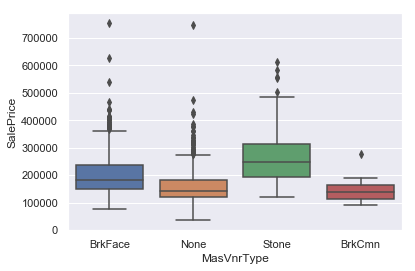

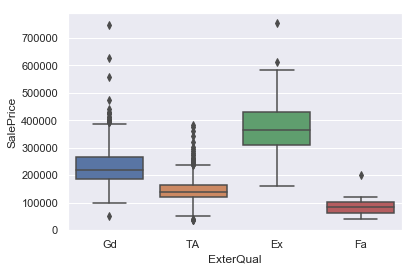

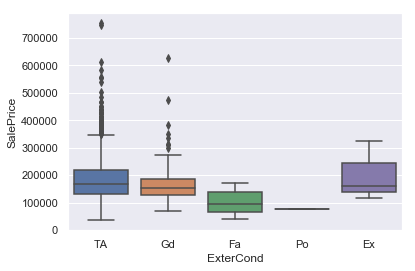

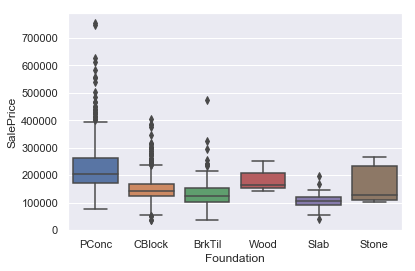

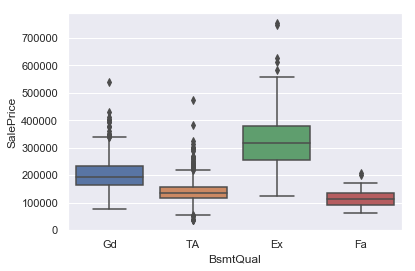

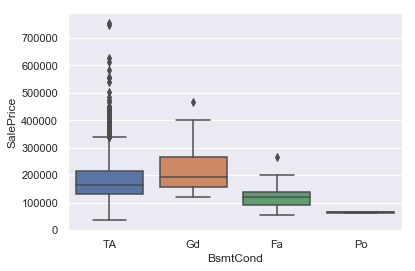

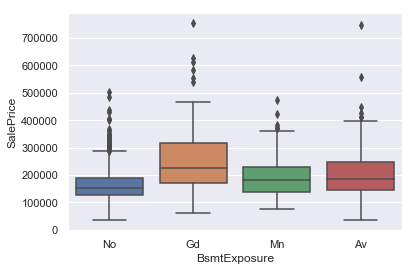

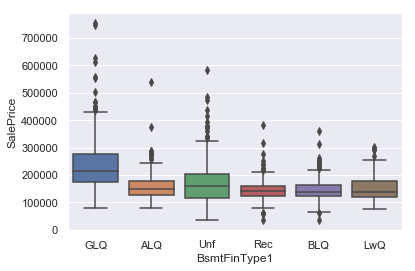

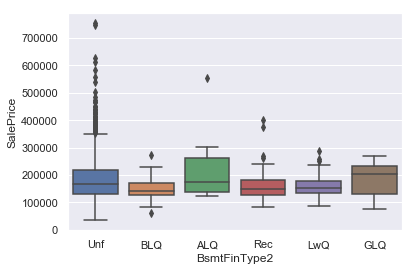

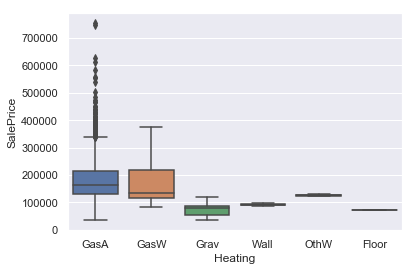

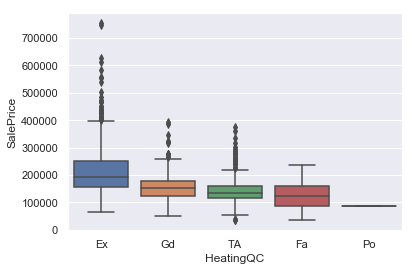

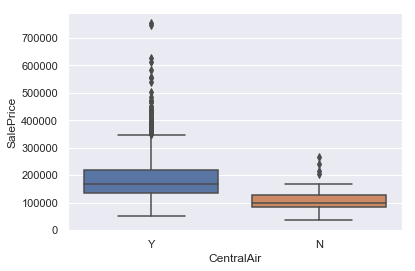

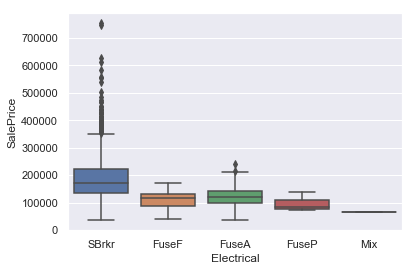

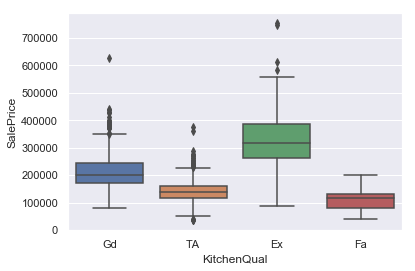

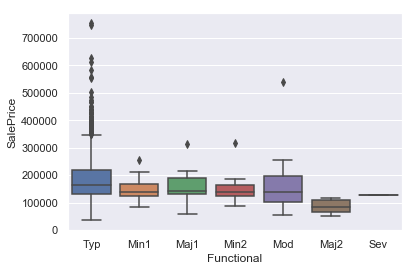

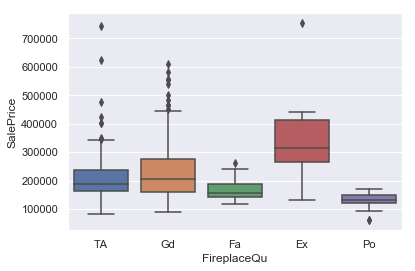

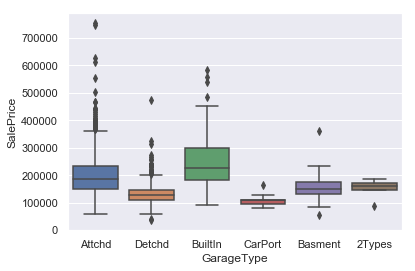

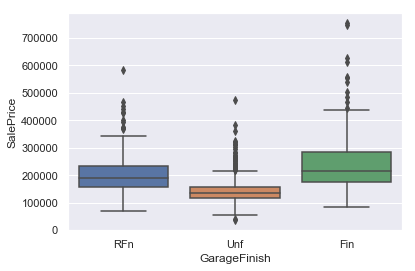

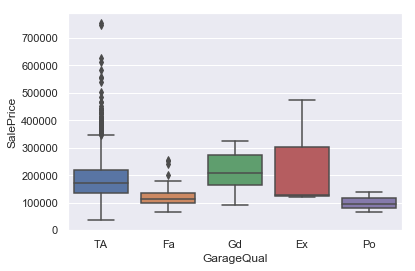

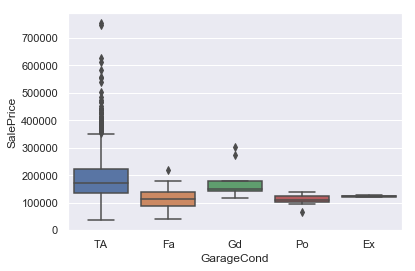

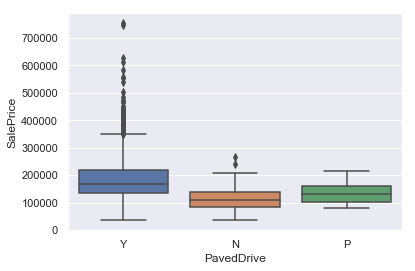

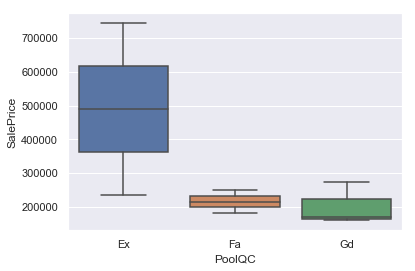

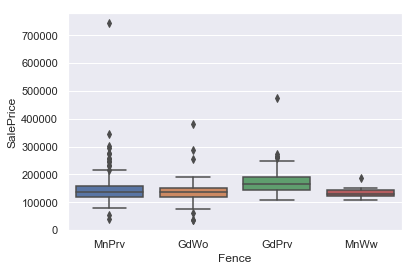

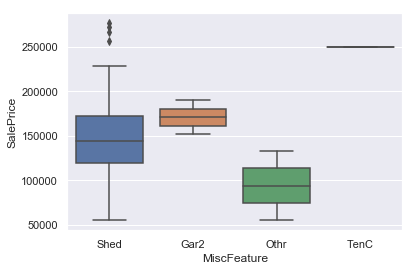

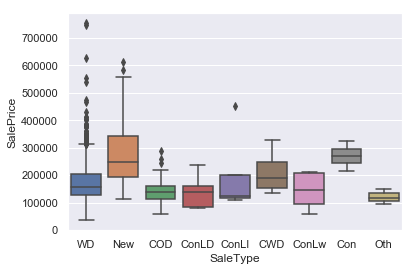

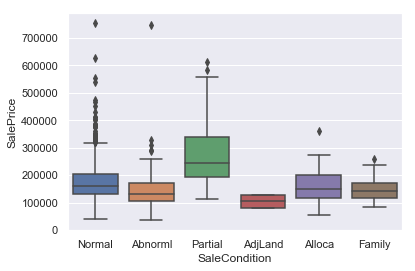

In [34]:
cater_cols = train.select_dtypes(include='object').columns.tolist()
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)